# Autoencoder

Autohenodery to sieci neuronowe zdolne do uczenia się wydajnych reprezentacji danych wejściowych, nazywanymi **codings** kodami, bez żadnego nadzoru. Te kody mają zazwyczaj znacznie mniejszą wymiarowość niż dane wejściowe, dzięki czemu autoenodemy są przydatne do redukcji wymiarów. 

Co ważniejsze, autoenodemy pełnią funkcję detektorów cech i mogą być używane jako ekstraktory cech (feature detectors) w głębokich sieciach neuronowe. 

Wreszcie są w stanie generować nowe dane, które wyglądają bardzo podobnie do danych uczących (nazywa się to modelem generatywnym). Możesz na przykład nauczyć autocenoder na zdjęciach twarzy, a następnie generować nowe twarze.


## Data Representations


Autoenoder zawsze składa się z dwóch części: 

  * enkodera, który konwertuje wejścia do nowej (wewnętrznwj) reprezentacji,
  * dekodera (lub sieci generatywna), który konwertuje wewnętrzną reprezentację na wyjścia.
  
Jak widać, autoenoderer zazwyczaj ma taką samą architekturę jak Perceptron wielowarstwowy (MLP), z tym że liczba neuronów w warstwie wyjściowej musi być równa liczbie wejść. 

W poniższym przykładzie istnieje tylko jedna ukryta warstwa złożona z dwóch neuronów (kodera) i jedna warstwa wyjściowa złożona z trzech neuronów (dekoder). Wyjścia są często nazywane **reconstructions** (rekonstrukcjami), ponieważ autoenoder próbuje zrekonstruować wejścia, a funkcja kosztu zawiera **reconstruction loss** (niedoskonałość rekonstrukcji), która karze model, gdy rekonstrukcje różnią się od wejść.  

## Wykonywanie PCA za pomocą autoenodera

Jeśli autoenoder wykorzystuje tylko aktywacje liniowe, a funkcja kosztu to błąd średniej kwadratowej (MSE), wówczas otrzymujemy PCA. Poniższy kod tworzy prosty liniowy autoencoder, aby wykonać PCA na zestawie danych 3D, wyświetlając go w 2D:

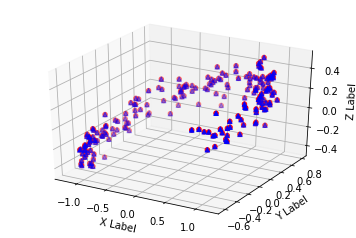

In [1]:
import numpy as np
import numpy.random as rnd
import os
import sys


rnd.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


# Zad
Wykonajs skalowanie danych
```python
from sklearn.preprocessing import StandardScaler
```

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])

In [3]:
def rec_error(x, y):
    diff = tf.layers.flatten(x) - tf.layers.flatten(y)
    return tf.reduce_mean(tf.reduce_sum(tf.square(diff), axis=1))

In [4]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs = 3
n_hidden = 2  # codings
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = rec_error(outputs, X)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)



C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
init = tf.global_variables_initializer()

n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("iteration ", iteration)
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
iteration  71
it

iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration 

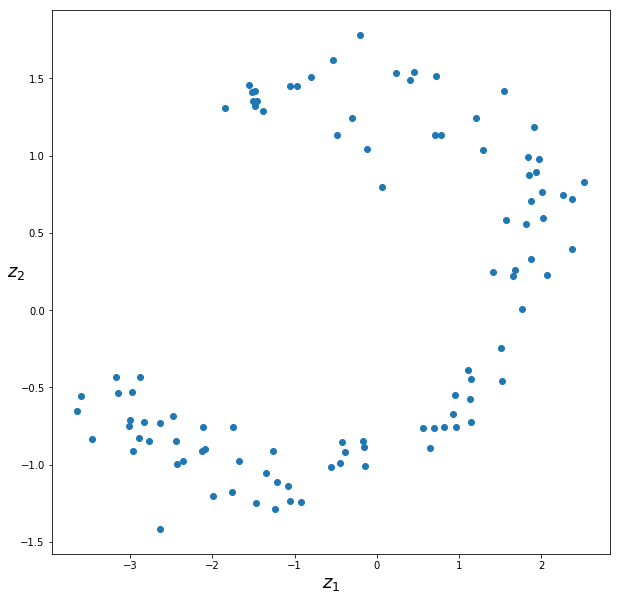

In [6]:
fig = plt.figure(figsize=(10,10))
plt.plot(codings_val[:,0], codings_val[:, 1], "o")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

Ten kod nie różni się bardzo od MLP. Dwie rzeczy do zapamiętania to:
  
  * Liczba wyjść jest równa liczbie wejść.
  * Aby wykonać prosty PCA, ustawiamy activation_fn = None (tj. Wszystkie neurony są liniowe), a funkcją kosztu jest MSE.

# Zad

Dla danych iris wykonaj redukcję wymiarowości za pomocą autoencodera.
Następnie wykonaj algorytm PCA i porównaj wyniki.

In [7]:
from sklearn.decomposition import PCA 
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
print(X_train.shape)

(150, 4)


In [8]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

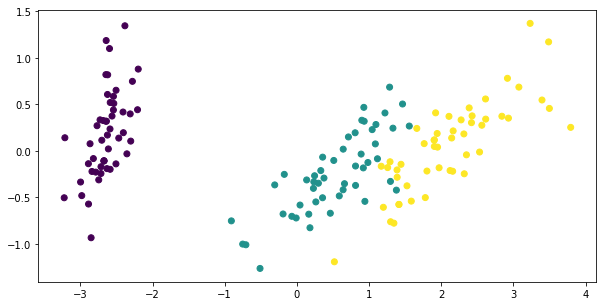

In [9]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c = y_train)
plt.show()

In [10]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs = 4
n_hidden = 2  # codings
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = rec_error(outputs, X)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [11]:
init = tf.global_variables_initializer()

n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("iteration ", iteration)
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_train})

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
iteration  71
it

iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration 

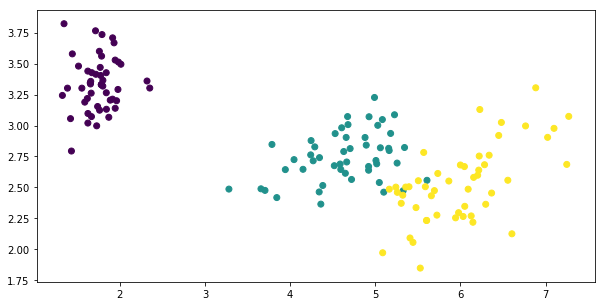

In [12]:
fig = plt.figure(figsize=(10,5))
plt.scatter(codings_val[:,0], codings_val[:, 1], c = y_train)
plt.show()

## Deep autoenkoder

Podobnie jak inne sieci neuronowe, o których mówiliśmy, autoenkodery mogą mieć wiele ukrytych warstw. W tym przypadku są one nazywane **deep autoenkoder** lub **stacked autoencoders**. 

Dodanie kolejnych warstw pomaga autoenkoderowi uzyskać bardziej złożone kodowanie. Należy jednak uważać, aby nie spowodować, aby autoenkoder był zbyt mocny. Wyobraź sobie enkoder tak potężny, że uczy się mapować każde wejście na jedną dowolną liczbę (a dekoder uczy odwrotnego mapowania). Oczywiście taki autoenkoder idealnie zrekonstruuje dane treningowe, ale nie nauczy się żadnej użytecznej reprezentacji danych (i jest mało prawdopodobne, aby generalizować dobrze nowe instancje).

Architektura głębokich autoenkoderó jest zwykle symetryczna w odniesieniu do centralnej ukrytej warstwy (warstwy kodującej). 

Na przykład, autoenoder do danych MNIST może mieć 784 neuronów wejścia, następnie ukryta warstwa z 300 neuronami, następnie centralna ukryta warstwa z 150 neuronów, następnie kolejna ukryta warstwa z 300 neuronami i warstwa wyjściowa z 784 neuronami. 

In [13]:
# ###########################################################################################
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)
# ###########################################################################################

(tr_images, _), (validation_images, _) = tf.keras.datasets.mnist.load_data()
tr_images = tr_images.astype(np.float32).reshape(-1,28*28) / 255.0
validation_images = validation_images.astype(np.float32).reshape(-1,28*28) / 255.0

In [14]:
print(tr_images.shape)
print(validation_images.shape)

(60000, 784)
(10000, 784)


In [15]:
# def euclidean_norm_squared(X, axis=None):
#     return tf.reduce_sum(tf.square(X), axis=axis)

# def mean_squared_euclidean_norm_reconstruction_error(input, output):
#     return tf.reduce_mean(euclidean_norm_squared(input - output, axis=1))

In [16]:
tf.reset_default_graph()

n_epochs = 101
batch_size = 128

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  # codings
z_dim = 20
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.relu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])


dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.shuffle(buffer_size=60000)
dataset = dataset.batch(batch_size)
#dataset = dataset.prefetch(buffer_size=5)

iterator = dataset.make_initializable_iterator()

data_X = iterator.get_next()

hidden1 = my_dense_layer(data_X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, units=z_dim)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
logits = my_dense_layer(hidden6, n_outputs)
# outputs = tf.sigmoid(logits)
outputs = logits

reconstruction_loss = rec_error(data_X, outputs)


learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [17]:
tr_images.shape

(60000, 784)

In [19]:


from_file = 0

reconstruction_cost_valid_array = []
with tf.Session() as sess:
    if from_file == 0:
        init.run()
    else:    
        saver.restore(sess, "./autoencoder_weights.ckpt")
    for epoch in range(n_epochs):
        n_batches = tr_images.shape[0] // batch_size
        
            
        sess.run(iterator.initializer, feed_dict = {X: tr_images})
        
        try:
            iteration = 0
#             for _ in range(n_batches):
            while True:
                print("\r{}%".format(100 * iteration // n_batches), end="")
#                 X_batch = sess.run(data_X)
                #print(X_batch.shape)
                training_op.run()
                iteration = iteration + 1
                
        except tf.errors.OutOfRangeError:
            pass
        #print(iteration)
        
        #ewal
        
        reconstruction_cost_valid = 0
        sess.run(iterator.initializer, feed_dict = {X: validation_images})
        
        n_batches = validation_images.shape[0] // batch_size
        try:
            for _ in range(n_batches):
                reconstruction_cost_valid = (reconstruction_cost_valid + reconstruction_loss.eval())/2
#                 sess.run(training_op, feed_dict={X: X_batch})

        except tf.errors.OutOfRangeError:
            pass
        
        print(" ", epoch, "Error:", reconstruction_cost_valid ) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        saver.save(sess, "./autoencoder_weights.ckpt")
        

100%  0 Error: 24.639834485081572
100%  1 Error: 22.31869123384567
100%  2 Error: 21.35762667621527
100%  3 Error: 20.47426778341502
100%  4 Error: 20.449088483865992
100%  5 Error: 20.124027151162966
100%  6 Error: 18.393846026391
100%  7 Error: 18.799116496470717
100%  8 Error: 18.81696376616572
100%  9 Error: 18.196337699028145
100%  10 Error: 18.096666964209717
100%  11 Error: 18.203715821268077
100%  12 Error: 17.218636583208966
100%  13 Error: 17.36811071678592
100%  14 Error: 18.176958093181298
100%  15 Error: 16.701865227103415
100%  16 Error: 17.536099932140527
100%  17 Error: 18.070009016280856
100%  18 Error: 17.380490904487164
100%  19 Error: 17.405952664859
100%  20 Error: 16.722076557313347
100%  21 Error: 15.99331304486723
100%  22 Error: 17.587607801772204
100%  23 Error: 15.768652588519853
100%  24 Error: 16.875600734379265
100%  25 Error: 16.554203324158514
100%  26 Error: 16.581982856229935
100%  27 Error: 16.834461623972693
100%  28 Error: 16.743927008008505
100%  2

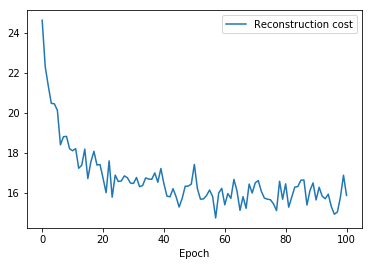

In [20]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./autoencoder_weights.ckpt


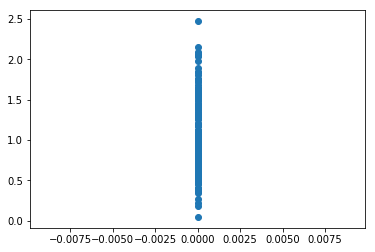

In [21]:
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder_weights.ckpt") 
    sess.run(iterator.initializer, feed_dict = {X: validation_images})
    z, Y = sess.run([z_mean, outputs], { X: validation_images })

    #plt.style.use('classic')
    #plt.figure(figsize=(6, 6))
    #plt.axes().set_aspect('equal')
#     plt.xlim(-0.06, 0.06)
#     plt.ylim(-0.06, 0.06)

    plt.scatter(z[:, 0], z[:, 1])

    plt.show()

In [22]:
# with tf.Session() as sess:
#     saver.restore(sess, "./autoencoder_weights.ckpt") 
#     z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

# import numpy as np
# from sklearn.manifold import TSNE
# z_embedded = TSNE(n_components=2).fit_transform(z)

In [23]:
# plt.figure(figsize=(10, 10))
# plt.axes().set_aspect('equal')
# # plt.xlim(-6, 6)
# # plt.ylim(-6, 6)

# plt.scatter(z_embedded[:, 0], z_embedded[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

# plt.show()

# Rekonstrukcje

In [24]:
n_test_digits = 100    
    
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})
    saver.restore(sess, "./autoencoder_weights.ckpt") 
    X_test = validation_images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={data_X: X_test})


INFO:tensorflow:Restoring parameters from ./autoencoder_weights.ckpt


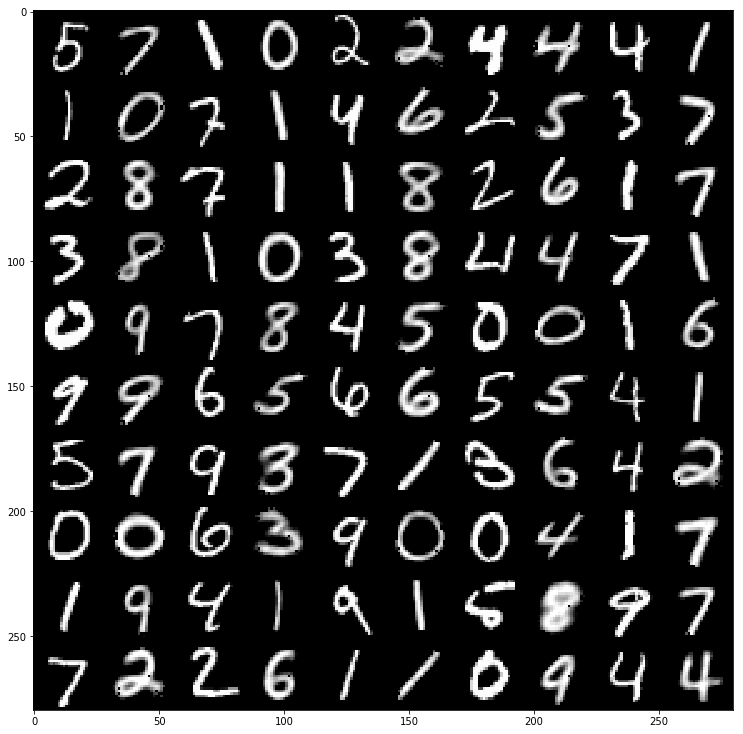

In [25]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
plt.tight_layout(pad=0)
plt.show()

# Variational Autoencoders

Kolejna ważna kategoria autododerów są: wariacyjnych autoencoder **Variational Autoencoders**.

Różnią się one od klasycznych autoencoder, które omówiliśmy do tej pory, w szczególności:

  * Są to probabilistyczne autoencodery, co oznacza, że ich wyniki są częściowo losowe.
  * Co najważniejsze, są to generatywne autoencoder, co oznacza, że mogą generować nowe instancje, które wyglądają, jakby zostały pobrane z zestawu treningowego.


Rzućmy okiem na to, jak działają Variational Autoencoders. Rysunek poniżej (jego lewa część) pokazuje Variational Autoencoders. Można oczywiście rozpoznać podstawową strukturę wszystkich autoencoderów, z enkoderem, po którym następuje dekoder (w tym przykładzie oba mają dwie ukryte warstwy), ale jest pewna różnica: zamiast bezpośredniego tworzenia kodu dla danego wejścia , koder wytwarza średnią $\mu$ i odchylenie standardowe $\sigma$. Rzeczywiste kodowanie jest następnie losowo próbkowane z rozkładu Gaussa ze średnią $\mu$ i odchyleniem standardowym $\sigma$. Następnie dekoder dekoduje normalnie kodowane próbkowanie. 

Prawa część diagramu pokazuje proces jaki przechdzą dane wejściowe przechodzące przez autoencoder. Najpierw enkoder wytwarza $\mu$ i $\sigma$, następnie losowo próbkowane jest kodowanie (zauważ, że nie jest ono dokładnie umiejscowione w $\mu$), i ostatecznie to kodowanie jest dekodowane, a końcowe wyjście przypomina instancję wejściową.

In [29]:
import tensorflow_probability as tfp

In [30]:
from tensorflow.contrib.distributions import MultivariateNormalDiag, kl_divergence

tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])

dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.shuffle(buffer_size=60000)
dataset = dataset.batch(batch_size)
#dataset = dataset.prefetch(buffer_size=5)

iterator = dataset.make_initializable_iterator()

data_X = iterator.get_next()

hidden1 = my_dense_layer(data_X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)
z_log_var = my_dense_layer(hidden3, z_dim, activation=None)

var_clip_val=3
variance = tf.exp(tf.clip_by_value(z_log_var, -var_clip_val, var_clip_val))
#tensor_z_distr = MultivariateNormalDiag(loc = z_mean, scale_diag= variance)
tensor_z_distr = tfp.distributions.MultivariateNormalDiag(loc = z_mean, scale_diag= variance)
noise = tensor_z_distr.sample()

hidden4 = my_dense_layer(noise, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)

target_distribution = tfp.distributions.MultivariateNormalDiag(loc= tf.zeros(z_dim), scale_diag=tf.ones(z_dim))

Dkl = tf.reduce_mean( kl_divergence(tensor_z_distr, target_distribution) )
reconstruction_loss = rec_error(data_X, outputs)


tensor_cost = tf.reduce_mean(reconstruction_loss + Dkl)

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(tensor_cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [38]:
from_file = 0

reconstruction_cost_valid_array = []
DKL_valid_array = []
with tf.Session() as sess:
    if from_file == 0:
        init.run()
    else:    
        saver.restore(sess, "./VAE_weights.ckpt")
    for epoch in range(n_epochs):
        n_batches = tr_images.shape[0] // batch_size
        
            
        sess.run(iterator.initializer, feed_dict = {X: tr_images})
        
        try:
            iteration = 0
#             for _ in range(n_batches):
            while True:
                print("\r{}%".format(100 * iteration // n_batches), end="")
#                 X_batch = sess.run(data_X)
                #print(X_batch.shape)
                training_op.run()
                iteration = iteration + 1
                
        except tf.errors.OutOfRangeError:
            pass
        #print(iteration)
        
        #ewal
        
        reconstruction_cost_valid = 0
        DKL_cost_valid = 0
        sess.run(iterator.initializer, feed_dict = {X: validation_images})
        
        n_batches = validation_images.shape[0] // batch_size
        try:
            for _ in range(n_batches):  
                rc_valid, DKL_valid = sess.run([reconstruction_loss, Dkl])
                reconstruction_cost_valid = (reconstruction_cost_valid + rc_valid)/2
                DKL_cost_valid = (DKL_cost_valid + DKL_valid)/2

        except tf.errors.OutOfRangeError:
            pass
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "DKL:", DKL_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        DKL_valid_array.append(DKL_cost_valid)

        saver.save(sess, "./VAE_weights.ckpt")


100%  0 Error: 36.174831984148334 DKL: 19.54254844491642
100%  1 Error: 31.596841785167918 DKL: 16.92278592713219
100%  2 Error: 28.320888527193624 DKL: 16.48664061172287
100%  3 Error: 28.330789402189133 DKL: 14.2731659892484
100%  4 Error: 27.02594841114255 DKL: 12.284369406007905
100%  5 Error: 26.74156432951095 DKL: 10.59155347627264
100%  6 Error: 25.17493890867791 DKL: 10.71709172320104
100%  7 Error: 24.979477967105097 DKL: 10.360950160366226
100%  8 Error: 24.61535485938704 DKL: 10.378218023353902
100%  9 Error: 25.521359213608484 DKL: 10.522058913271175
100%  10 Error: 24.519588183628073 DKL: 9.295945061799038
100%  11 Error: 23.94647621417074 DKL: 9.395271608241492
100%  12 Error: 23.527038204932815 DKL: 9.157478689131382
100%  13 Error: 23.745198848804144 DKL: 9.176158109515614
100%  14 Error: 22.736665641836172 DKL: 9.103456307968035
100%  15 Error: 22.54724277107569 DKL: 9.430991195201681
100%  16 Error: 23.150350586402926 DKL: 9.602712733361338
100%  17 Error: 22.99901941

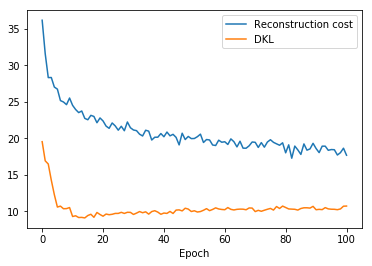

In [40]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(DKL_valid_array, label='DKL')

plt.xlabel('Epoch')
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


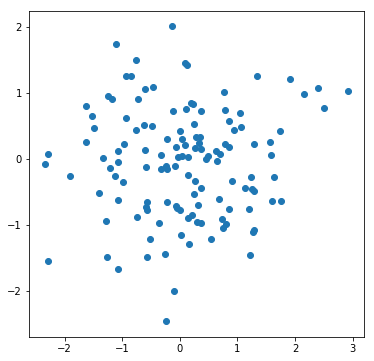

In [44]:
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./VAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: validation_images })
    
    plt.figure(figsize=(6, 6))
#     plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1])

    plt.show()

In [ ]:
# import numpy as np
# from sklearn.manifold import TSNE
# z_embedded = TSNE(n_components=2).fit_transform(z)

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.axes().set_aspect('equal')
# # plt.xlim(-6, 6)
# # plt.ylim(-6, 6)

# plt.scatter(z_embedded[:, 0], z_embedded[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

# plt.show()

# Reconstrukcje

In [46]:
n_test_digits = 100    
    
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./VAE_weights.ckpt") 
    X_test = validation_images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={data_X: X_test})

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


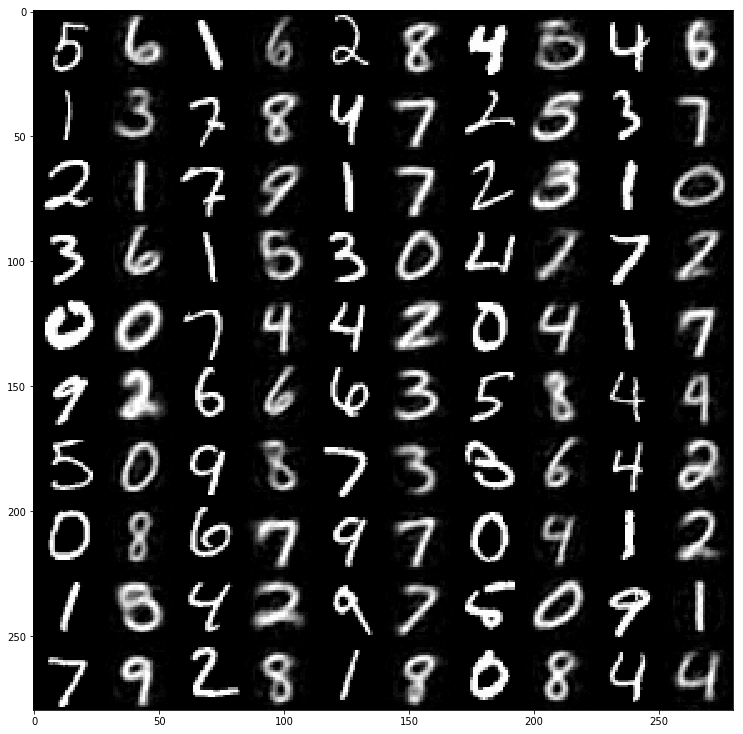

In [47]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


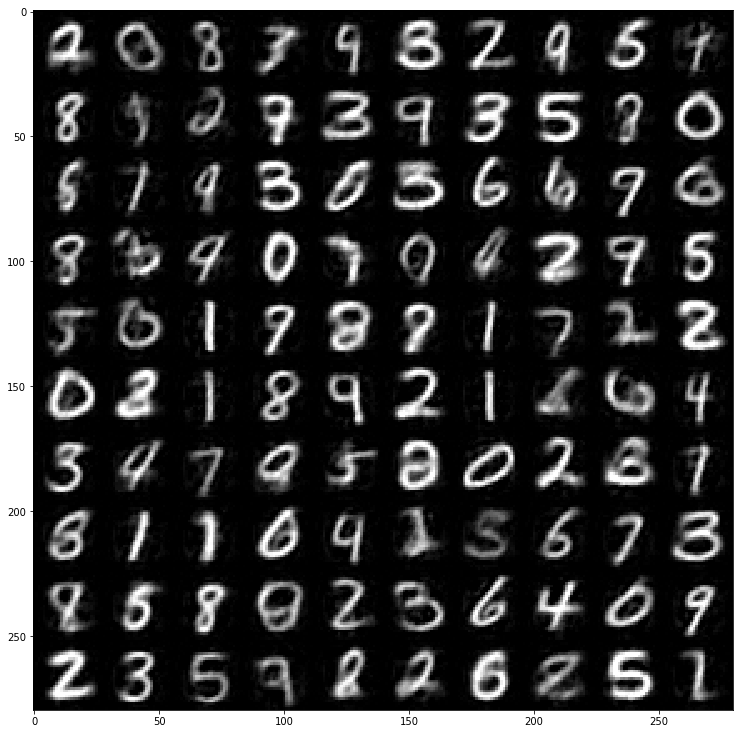

In [48]:
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./VAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { noise: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


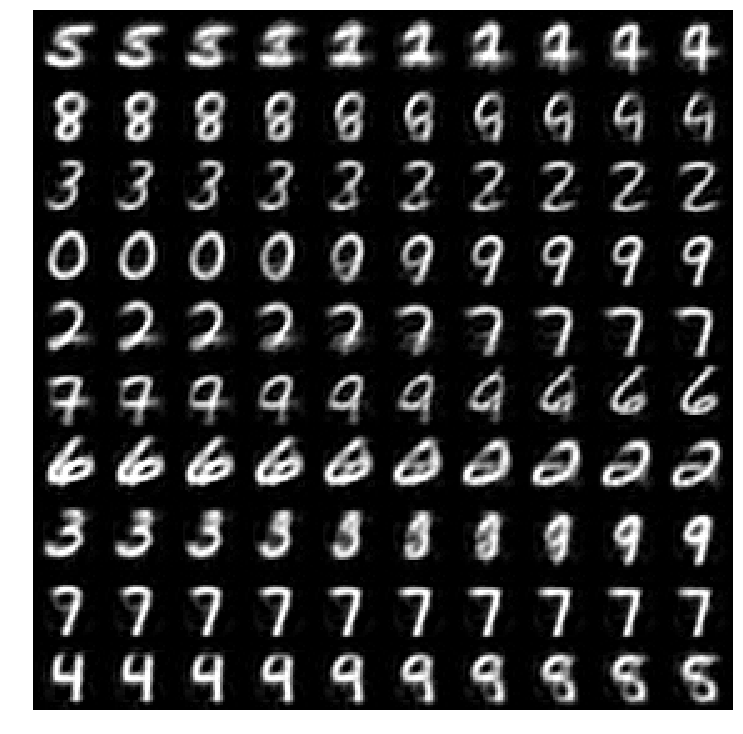

In [50]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./VAE_weights.ckpt")  
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = validation_images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { noise: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(canvas, origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# CWAE

In [53]:
def cw_index(Z, y=None):

    def euclidean_norm_squared(X, axis=None):
        return tf.reduce_sum(tf.square(X), axis=axis)
    D = tf.cast(tf.shape(Z)[1], tf.float32)
    N = tf.cast(tf.shape(Z)[0], tf.float32)
    y = tf.pow(4/(3*N), 0.4)

    K = 1/(2*D-3)

    A1 = euclidean_norm_squared(tf.subtract(tf.expand_dims(Z, 0), tf.expand_dims(Z, 1)), axis=2)
    A = (1/(N**2)) * tf.reduce_sum((1/tf.sqrt(y + K*A1)))

    B1 = euclidean_norm_squared(Z, axis=1)
    B = (2/N)*tf.reduce_sum((1/tf.sqrt(y + 0.5 + K*B1)))

    return (1/tf.sqrt(1+y)) + A - B

In [55]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])

dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.shuffle(buffer_size=60000)
dataset = dataset.batch(batch_size)
#dataset = dataset.prefetch(buffer_size=5)

iterator = dataset.make_initializable_iterator()

data_X = iterator.get_next()

hidden1 = my_dense_layer(data_X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)


CW_cost = tf.reduce_mean( cw_index(z_mean) )

# reconstruction_error = tf.reduce_sum(tf.square( X - outputs ))


reconstruction_loss = rec_error(data_X, outputs)

cost = ( reconstruction_loss  + tf.log(CW_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [64]:
from_file = 0

reconstruction_cost_valid_array = []
CW_valid_array = []
with tf.Session() as sess:
    if from_file == 0:
        init.run()
    else:    
        saver.restore(sess, "./CWAE_weights.ckpt")
    for epoch in range(n_epochs):
        n_batches = tr_images.shape[0] // batch_size
        
            
        sess.run(iterator.initializer, feed_dict = {X: tr_images})
        
        try:
            iteration = 0
#             for _ in range(n_batches):
            while True:
                print("\r{}%".format(100 * iteration // n_batches), end="")
#                 X_batch = sess.run(data_X)
                #print(X_batch.shape)
                training_op.run()
                iteration = iteration + 1
                
        except tf.errors.OutOfRangeError:
            pass
        #print(iteration)
        
        #ewal
        
        reconstruction_cost_valid = 0
        CW_cost_valid = 0
        sess.run(iterator.initializer, feed_dict = {X: validation_images})
        
        n_batches = validation_images.shape[0] // batch_size
        try:
            for _ in range(n_batches):  
                rc_valid, CW_valid = sess.run([reconstruction_loss, CW_cost])
                reconstruction_cost_valid = (reconstruction_cost_valid + rc_valid)/2
                CW_cost_valid = (CW_cost_valid + CW_valid)/2

        except tf.errors.OutOfRangeError:
            pass
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "CW cost:", CW_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        CW_valid_array.append(CW_cost_valid)

        saver.save(sess, "./CWAE_weights.ckpt")

100%  0 Error: 31.51898524380504 CW cost: 0.6880080927835571
100%  1 Error: 27.15721677005119 CW cost: 0.5385586830649407
100%  2 Error: 25.797567741066995 CW cost: 0.41093029718822993
100%  3 Error: 22.756602815422383 CW cost: 0.29253543530997744
100%  4 Error: 23.19864106543387 CW cost: 0.19856973914260798
100%  5 Error: 21.341992710543956 CW cost: 0.12063034353897586
100%  6 Error: 20.619420559934667 CW cost: 0.10071572824085087
100%  7 Error: 19.55372525694413 CW cost: 0.08092231048484351
100%  8 Error: 19.267874255564724 CW cost: 0.07586862606328036
100%  9 Error: 18.853674641675294 CW cost: 0.0709214936644059
100%  10 Error: 18.946452485120265 CW cost: 0.06504703787864778
100%  11 Error: 18.626569192951948 CW cost: 0.06380665396796505
100%  12 Error: 18.242717392342282 CW cost: 0.06263195872006215
100%  13 Error: 18.509639702748885 CW cost: 0.06131653986540854
100%  14 Error: 17.244103645992748 CW cost: 0.05795443682027887
100%  15 Error: 16.72915246873038 CW cost: 0.057241884691

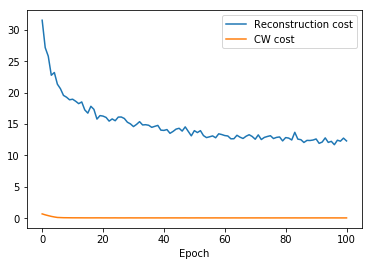

In [65]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(CW_valid_array, label='CW cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


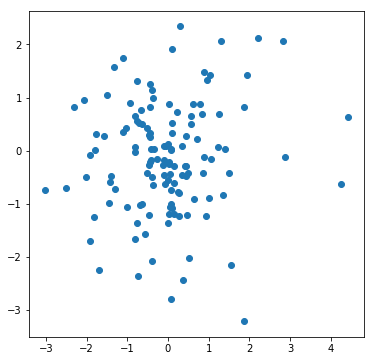

In [68]:
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})     
    saver.restore(sess, "./CWAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: validation_images })
    
    
    plt.figure(figsize=(6, 6))
#     plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1])

    plt.show()    

# Reconstrukcje

In [71]:
n_test_digits = 50    
    
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./CWAE_weights.ckpt") 
    X_test = validation_images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={data_X: X_test})

INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


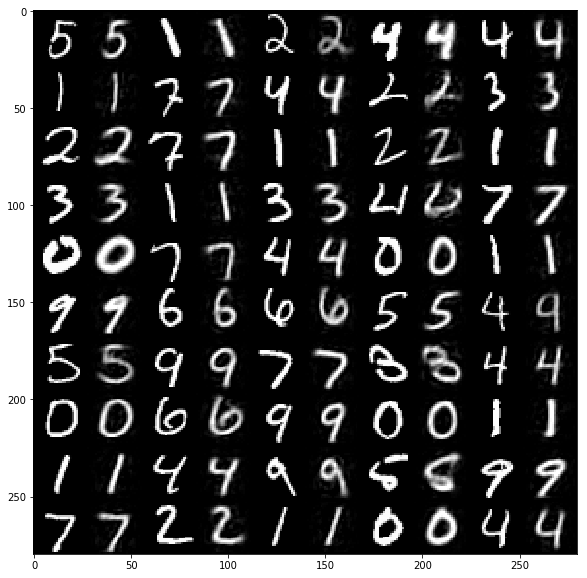

In [72]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
# plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


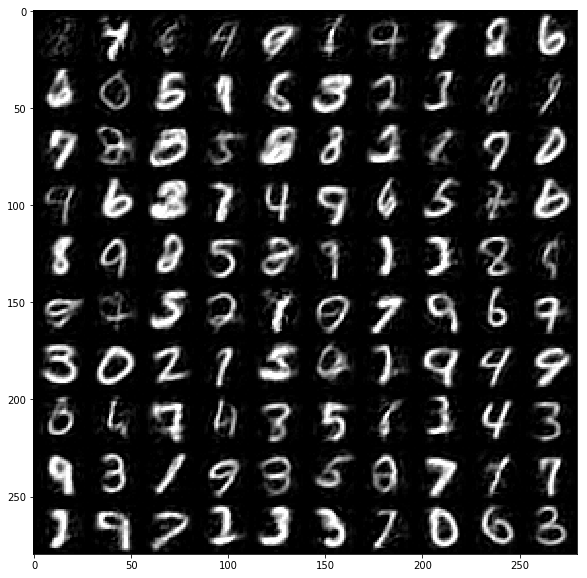

In [73]:
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./CWAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { z_mean: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
#     plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


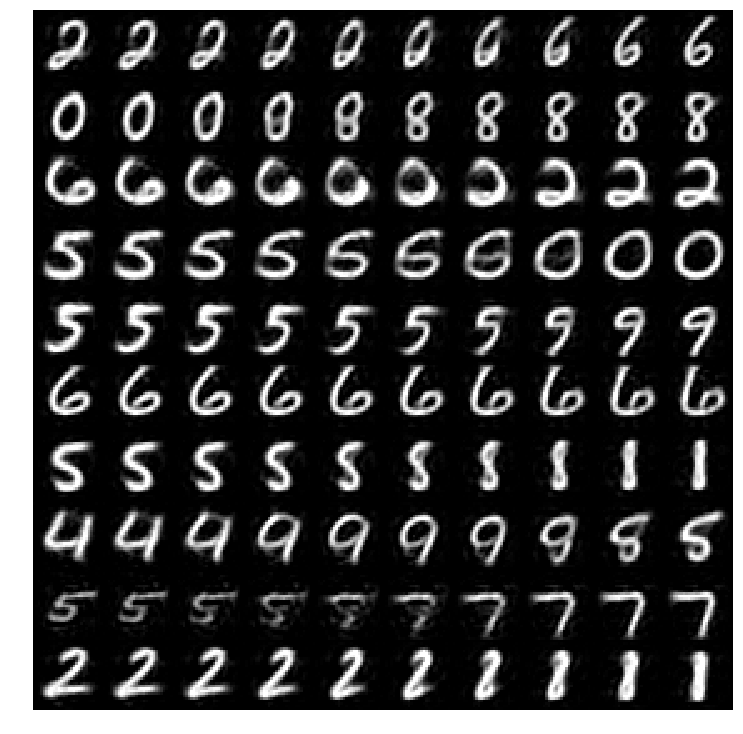

In [75]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./CWAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = validation_images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { z_mean: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# Wasserstein Auto-Encoders

https://github.com/tolstikhin/wae/blob/master/wae.py

In [76]:
def mmd_penalty(sample_qz, sample_pz):
    sigma2_p = 1. ** 2
    kernel = 'IMQ'

    n = tf.cast(tf.shape(sample_qz)[0], tf.float32)#utils.get_batch_size(sample_qz)
    d = tf.cast(tf.shape(sample_qz)[1], tf.float32)

    n = tf.cast(n, tf.int32)
    nf = tf.cast(n, tf.float32)
    half_size = (n * n - n) / 2

    norms_pz = tf.reduce_sum(tf.square(sample_pz), axis=1, keep_dims=True)
    dotprods_pz = tf.matmul(sample_pz, sample_pz, transpose_b=True)
    distances_pz = norms_pz + tf.transpose(norms_pz) - 2. * dotprods_pz

    norms_qz = tf.reduce_sum(tf.square(sample_qz), axis=1, keep_dims=True)
    dotprods_qz = tf.matmul(sample_qz, sample_qz, transpose_b=True)
    distances_qz = norms_qz + tf.transpose(norms_qz) - 2. * dotprods_qz

    dotprods = tf.matmul(sample_qz, sample_pz, transpose_b=True)
    distances = norms_qz + tf.transpose(norms_pz) - 2. * dotprods

    if kernel == 'RBF':
        # Median heuristic for the sigma^2 of Gaussian kernel
        sigma2_k = tf.nn.top_k(
            tf.reshape(distances, [-1]), half_size).values[half_size - 1]
        sigma2_k += tf.nn.top_k(
            tf.reshape(distances_qz, [-1]), half_size).values[half_size - 1]
        # Maximal heuristic for the sigma^2 of Gaussian kernel
        # sigma2_k = tf.nn.top_k(tf.reshape(distances_qz, [-1]), 1).values[0]
        # sigma2_k += tf.nn.top_k(tf.reshape(distances, [-1]), 1).values[0]
        # sigma2_k = opts['latent_space_dim'] * sigma2_p
        res1 = tf.exp(- distances_qz / 2. / sigma2_k)
        res1 += tf.exp(- distances_pz / 2. / sigma2_k)
        res1 = tf.multiply(res1, 1. - tf.eye(n))
        res1 = tf.reduce_sum(res1) / (nf * nf - nf)
        res2 = tf.exp(- distances / 2. / sigma2_k)
        res2 = tf.reduce_sum(res2) * 2. / (nf * nf)
        stat = res1 - res2
    elif kernel == 'IMQ':
        # k(x, y) = C / (C + ||x - y||^2)
        # C = tf.nn.top_k(tf.reshape(distances, [-1]), half_size).values[half_size - 1]
        # C += tf.nn.top_k(tf.reshape(distances_qz, [-1]), half_size).values[half_size - 1]
        #if opts['pz'] == 'normal':
        Cbase = 2. * d * sigma2_p
        #elif opts['pz'] == 'sphere':
        #    Cbase = 2.
        #elif opts['pz'] == 'uniform':
            # E ||x - y||^2 = E[sum (xi - yi)^2]
            #               = zdim E[(xi - yi)^2]
            #               = const * zdim
        #    Cbase = opts['zdim']
        stat = 0.
        for scale in [.1, .2, .5, 1., 2., 5., 10.]:
            C = Cbase * scale
            res1 = C / (C + distances_qz)
            res1 += C / (C + distances_pz)
            res1 = tf.multiply(res1, 1. - tf.eye(n))
            res1 = tf.reduce_sum(res1) / (nf * nf - nf)
            res2 = C / (C + distances)
            res2 = tf.reduce_sum(res2) * 2. / (nf * nf)
            stat += res1 - res2
    return stat


In [78]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])

dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.shuffle(buffer_size=60000)
dataset = dataset.batch(batch_size)
#dataset = dataset.prefetch(buffer_size=5)

iterator = dataset.make_initializable_iterator()

data_X = iterator.get_next()

sample_z = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_z')
hidden1 = my_dense_layer(data_X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)


WAE_cost = tf.reduce_mean(  mmd_penalty(sample_z, z_mean) )

reconstruction_loss = rec_error(data_X, outputs)

cost = ( reconstruction_loss  + (WAE_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [89]:
from_file = 0

reconstruction_cost_valid_array = []
WAE_valid_array = []
with tf.Session() as sess:
    if from_file == 0:
        init.run()
    else:    
        saver.restore(sess, "./WAE_weights.ckpt")
    for epoch in range(n_epochs):
        n_batches = tr_images.shape[0] // batch_size
        
            
        sess.run(iterator.initializer, feed_dict = {X: tr_images})
        
        try:
            iteration = 0
            for _ in range(n_batches):
#             while True:
                print("\r{}%".format(100 * iteration // n_batches), end="")
#                 X_batch = sess.run(data_X)
                #print(X_batch.shape)
    
                mean = np.zeros(z_dim)
                cov = np.identity(z_dim)
                num = batch_size#data_X.shape[0]
                noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)

                training_op.run(feed_dict={sample_z: noise})
                iteration = iteration + 1
                
        except tf.errors.OutOfRangeError:
            pass
        #print(iteration)
        
        #ewal
        
        reconstruction_cost_valid = 0
        WAE_cost_valid = 0
        sess.run(iterator.initializer, feed_dict = {X: validation_images})
        
        n_batches = validation_images.shape[0] // batch_size
        try:
            for _ in range(n_batches): 
                mean = np.zeros(z_dim)
                cov = np.identity(z_dim)
                num = batch_size#data_X.shape[0]
                noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)

                rc_valid, WAE_valid = sess.run([reconstruction_loss, WAE_cost], feed_dict={sample_z: noise})
                reconstruction_cost_valid = (reconstruction_cost_valid + rc_valid)/2
                WAE_cost_valid = (WAE_cost_valid + WAE_valid)/2

        except tf.errors.OutOfRangeError:
            pass
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "WAE cost:", WAE_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        WAE_valid_array.append(WAE_cost_valid)

        saver.save(sess, "./WAE_weights.ckpt")

99%  0 Error: 30.86067409400624 WAE cost: 1.3014292736401623
99%  1 Error: 26.69461964516033 WAE cost: 1.0351480668892745
99%  2 Error: 24.105601474912955 WAE cost: 0.8855291665283566
99%  3 Error: 23.39983683098527 WAE cost: 0.6788308808264112
99%  4 Error: 22.452457446809493 WAE cost: 0.5200363297882606
99%  5 Error: 21.03427435243936 WAE cost: 0.3546375461945892
99%  6 Error: 20.07914906048427 WAE cost: 0.33638801041797073
99%  7 Error: 18.858753393765795 WAE cost: 0.2366067625808859
99%  8 Error: 18.77580809386624 WAE cost: 0.2095755722842643
99%  9 Error: 18.57963983673445 WAE cost: 0.14905268705503855
99%  10 Error: 17.89951903058513 WAE cost: 0.1284930531072399
99%  11 Error: 17.060731666964386 WAE cost: 0.12478942944108945
99%  12 Error: 17.126661074985023 WAE cost: 0.09105718812218833
99%  13 Error: 17.674151721379385 WAE cost: 0.0790952454671549
99%  14 Error: 16.841346279426105 WAE cost: 0.08768039859538126
99%  15 Error: 16.802968089103842 WAE cost: 0.057812869286950314
99%

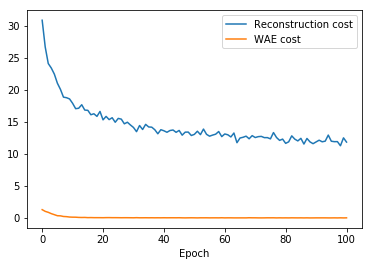

In [93]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(WAE_valid_array, label='WAE cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./WAE_weights.ckpt


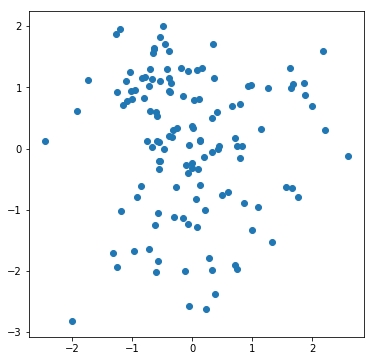

In [94]:

with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})     
    saver.restore(sess, "./WAE_weights.ckpt")  
    z, Y = sess.run([z_mean, outputs], { X: validation_images })
    
    
    plt.figure(figsize=(6, 6))
#     plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1])

    plt.show() 


# Reconstrukcje

In [95]:
n_test_digits = 50    
    
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./WAE_weights.ckpt") 
    X_test = validation_images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={data_X: X_test})
    

INFO:tensorflow:Restoring parameters from ./WAE_weights.ckpt


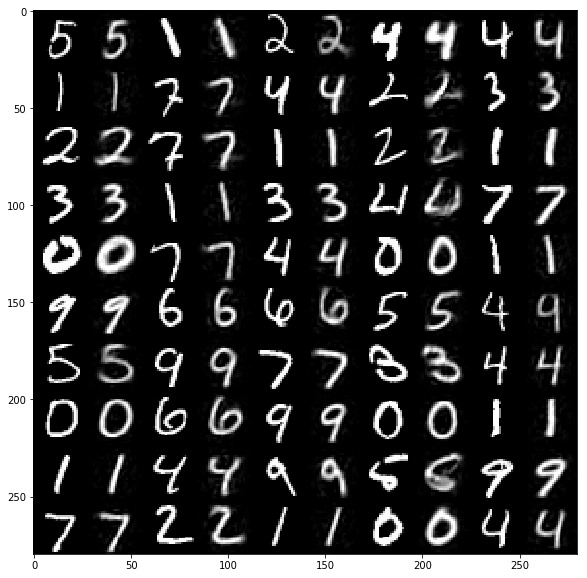

In [96]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
# plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

INFO:tensorflow:Restoring parameters from ./WAE_weights.ckpt


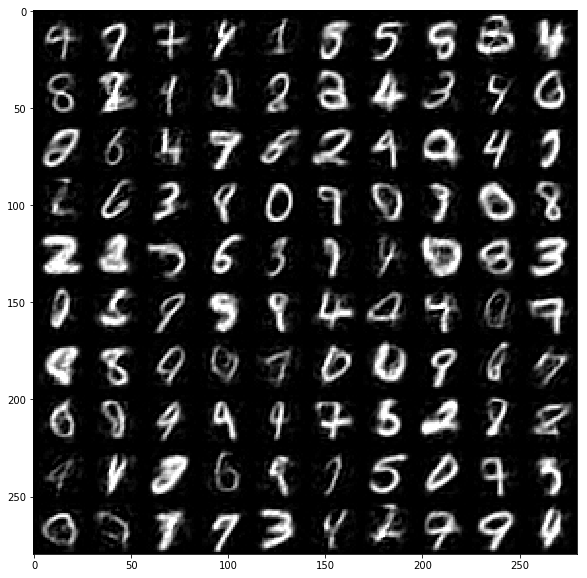

In [97]:
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./WAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { z_mean: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
#     plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

INFO:tensorflow:Restoring parameters from ./WAE_weights.ckpt


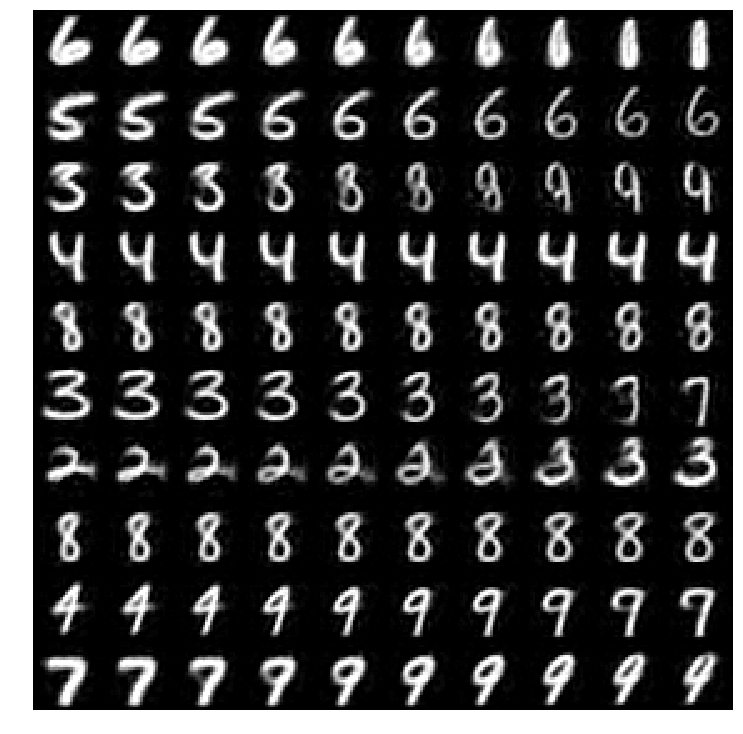

In [99]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict = {X: validation_images})    
    saver.restore(sess, "./WAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = validation_images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { z_mean: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(canvas, origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# Sliced-Wasserstein Autoencoder

https://arxiv.org/pdf/1804.01947.pdf

In [112]:
def SWAE_cost(aencoded, sample, theta):
    n = tf.cast(tf.shape(aencoded)[0], tf.int32)
    # Let projae be the projection of the encoded samples
    projae=tf.keras.backend.dot(aencoded, tf.transpose(theta))
    # Let projz be the projection of the $q_Z$ samples
    projz=tf.keras.backend.dot(sample, tf.transpose(theta))
    # Calculate the Sliced Wasserstein distance by sorting
    # the projections and calculating the L2 distance between
    W2=(tf.nn.top_k(tf.transpose(projae),k=n).values-
        tf.nn.top_k(tf.transpose(projz),k=n).values)**2
    return( tf.reduce_mean(W2) )

def generateTheta(L,endim):
    # This function generates L random samples from the unit `ndim'-u
    theta=[w/np.sqrt((w**2).sum()) for w in np.random.normal(size=(L,endim))]
    return np.asarray(theta)

def generateZ(batchsize):
    # This function generates 2D samples from a `circle' distribution in
    # a 2-dimensional space
    temp=make_circles(2*batchsize,noise=.01)
    return np.squeeze(temp[0][np.argwhere(temp[1]==0),:])

In [113]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
sample_z = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_z')
theta_tensor = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_theta')

dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.shuffle(buffer_size=60000)
dataset = dataset.batch(batch_size)
#dataset = dataset.prefetch(buffer_size=5)

iterator = dataset.make_initializable_iterator()

data_X = iterator.get_next()

hidden1 = my_dense_layer(data_X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)


SWAE_cost = tf.reduce_mean(SWAE_cost(aencoded = z_mean, sample = sample_z, theta = theta_tensor))

reconstruction_loss = rec_error(data_X, outputs)

cost = ( reconstruction_loss  + (SWAE_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
from_file = 0
L=50

reconstruction_cost_valid_array = []
SWAE_valid_array = []
with tf.Session() as sess:
    if from_file == 0:
        init.run()
    else:    
        saver.restore(sess, "./SWAE_weights.ckpt")
    for epoch in range(n_epochs):
        n_batches = tr_images.shape[0] // batch_size
        
            
        sess.run(iterator.initializer, feed_dict = {X: tr_images})
        
        try:
            iteration = 0
            for _ in range(n_batches):
#             while True:
                print("\r{}%".format(100 * iteration // n_batches), end="")
#                 X_batch = sess.run(data_X)
                #print(X_batch.shape)
    
                mean = np.zeros(z_dim)
                cov = np.identity(z_dim)
                num = batch_size#data_X.shape[0]
                noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)

                theta_=generateTheta(L,z_dim)

                
                training_op.run(feed_dict={sample_z: noise, theta_tensor: theta_})
                iteration = iteration + 1
                
        except tf.errors.OutOfRangeError:
            pass
        #print(iteration)
        
        #ewal
        
        reconstruction_cost_valid = 0
        SWAE_cost_valid = 0
        sess.run(iterator.initializer, feed_dict = {X: validation_images})
        
        n_batches = validation_images.shape[0] // batch_size
        try:
            for _ in range(n_batches): 
                mean = np.zeros(z_dim)
                cov = np.identity(z_dim)
                num = batch_size#data_X.shape[0]
                noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)

                
                rc_valid, SWAE_valid = sess.run([reconstruction_loss, SWAE_cost], feed_dict={sample_z: noise, theta_tensor: theta_})
                reconstruction_cost_valid = (reconstruction_cost_valid + rc_valid)/2
                SWAE_cost_valid = (SWAE_cost_valid + SWAE_valid)/2

        except tf.errors.OutOfRangeError:
            pass
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "SWAE cost:", SWAE_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        WAE_valid_array.append(SWAE_cost_valid)

        saver.save(sess, "./SWAE_weights.ckpt")

99%  0 Error: 31.145219101234314 SWAE cost: 0.681051924111707
99%  1 Error: 27.115501270120575 SWAE cost: 0.5739950890785205
99%  2 Error: 24.320860029912737 SWAE cost: 0.5305224081234897
99%  3 Error: 23.793340719530093 SWAE cost: 0.4413538570812297
99%  4 Error: 21.954886442226503 SWAE cost: 0.3847748096912734
99%  5 Error: 21.20286957988204 SWAE cost: 0.35328849733751094
99%  6 Error: 21.493305109965313 SWAE cost: 0.32844748401501794
99%  7 Error: 19.76242973197782 SWAE cost: 0.31377538304989994
99%  8 Error: 20.160954076779333 SWAE cost: 0.22233437099032255
99%  9 Error: 19.293353461851616 SWAE cost: 0.19240241653662843
99%  10 Error: 19.66093345950907 SWAE cost: 0.16839528852386088
99%  11 Error: 18.399335042694464 SWAE cost: 0.1423518401584816
99%  12 Error: 17.90374281649686 SWAE cost: 0.15117332049112295
99%  13 Error: 18.06147371003576 SWAE cost: 0.10989414740791073
99%  14 Error: 16.788296759968 SWAE cost: 0.09397413925131406
99%  15 Error: 17.036397464438195 SWAE cost: 0.093

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(SW_valid_array, label='SWAE cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./SWAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

    plt.figure(figsize=(6, 6))
    plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

    plt.show()

# Reconstrukcje

In [ ]:
n_test_digits = 50    
    
with tf.Session() as sess:
    saver.restore(sess, "./SWAE_weights.ckpt") 
    X_test = mnist.train.images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={X: X_test})

In [ ]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
# plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "SWAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { z_mean: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
#     plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

In [ ]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    saver.restore(sess, "./SWAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = mnist.validation.images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { z_mean: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(canvas, origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()